# Pandas. Загрузка библиотек

In [ ]:
## Описание и загрузка библиотеки

 -  <a href="http://pandas.pydata.org/">Pandas</a> - библиотека для обработки и анализа данных. Предназначена для данных разной природы - матричных, панельных данных, временных рядов. Претендует на звание самого мощного и гибкого средства для анализа данных с открытым исходным кодом.

In [5]:
import pandas as pd # Загружаем модуль pandas

В пандас есть две структуры данных:
- Series: одномерный массив с именованными индексами (чаще всего, данные одного типа)
- DataFrame: двухмерный массив, имеет табличную структуру, легко изменяется по размерам, может содержать в себе данные разных типов

Оба типа можно создавать вручную с помощью функций из самой библиотеки:
- pandas.Series(data=None, index=None, dtype=None)
- pandas.DataFrame(data=None, index=None, columns=None, dtype=None)

- **data** - данные, которые надо записать в структуру
- **index** - индексы строк
- **columns** - названия столбцов
- **dtype** - тип данных

Кроме data, остальные параметры опциональны


Мы, конечно, можем сами создавать датафреймы!

Например, кто-то нашел нам кусок данных и просит воспроизвести этот датасет:

<img src="https://i.imgur.com/FUCGiKP.png">

Давайте разберемся, что здесь, что и запишем в известную нам конструкцию - листы. 

In [6]:
columns = ['country', 'province', 'region_1', 'region_2'] # Создаем список, в котором будут храниться названия столбцов
index = [0, 1, 10, 100] # Создаем список, в котором будут индексы строк

# Создаем список с данными, каждая строка таблицы - отдельный список
data = [['Italy', 'Sicily & Sardinia', 'Etna', 'NaN'], 
        ['Portugal', 'Douro', 'NaN', 'NaN'],
       ['US', 'California', 'Napa Valley', 'Napa'],
       ['US', 'New York', 'Finger Lakes', 'Finger Lakes']]

А теперь соберем в датафрейм

In [7]:
df = pd.DataFrame(data, columns = columns, index = index) # Создаем ДатаФрейм (в качестве параметров передаем называние столбцов, индексы и сами данные)
df # Отображаем наш ДатаФрейм (лучше без использования функции print())

country           province      region_1      region_2
0       Italy  Sicily & Sardinia          Etna           NaN
1    Portugal              Douro           NaN           NaN
10         US         California   Napa Valley          Napa
100        US           New York  Finger Lakes  Finger Lakes

In [8]:
## Загрузка и запись данных


- Функции типа **pd.read_формат** и **pd.to_формат**
считывают и записывают данные соответственно. <br /> Полный список можно найти в документации:
https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

Научимся считывать данные в формате csv (comma separated value) функцией:

- <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv"> pd.read_csv()</a>: 

Аргументов у нее очень много, критически важные:
 - **filepath_or_buffer** - текстовая строка с названием (адресом) файла
 - **sep** - разделитель между данными
 - **header** - номер строки, в которой в файле указаны названия столбцов, None, если нет
 - **names** - список с названиями колонок
 - **index_col** - или номер столбца, или список,  или ничего - колонка, из которой надо взять названия строк

In [14]:
data = pd.read_csv('wine_base.csv') # С помощью метода read_csv загружаем файл wine_base.csv и записываем данные в data

**Смотрим, что загрузилось**


In [17]:
data.tail() # С помощью метода head выводим первые 5 строк нашего ДатаФрейма

Unnamed: 0 country                                        description  \
150925      150925   Italy  Many people feel Fiano represents southern Ita...   
150926      150926  France  Offers an intriguing nose with ginger, lime an...   
150927      150927   Italy  This classic example comes from a cru vineyard...   
150928      150928  France  A perfect salmon shade, with scents of peaches...   
150929      150929   Italy  More Pinot Grigios should taste like this. A r...   

            designation  points  price            province           region_1  \
150925              NaN      91   20.0      Southern Italy  Fiano di Avellino   
150926   Cuvée Prestige      91   27.0           Champagne          Champagne   
150927    Terre di Dora      91   20.0      Southern Italy  Fiano di Avellino   
150928  Grand Brut Rosé      90   52.0           Champagne          Champagne   
150929              NaN      90   15.0  Northeastern Italy         Alto Adige   

       region_2          variety                 winery  
150925      NaN      White Blend  Feudi di San Gregorio  
150926      NaN  Champagne Blend              H.Germain  
150927      NaN      White Blend              Terredora  
150928      NaN  Champagne Blend                 Gosset  
150929      NaN     Pinot Grigio          Alois Lageder

Что-то не то с первым столбцом, немного поправим

In [18]:
data = pd.read_csv('wine_base.csv', index_col = 0) # В параметре index_col указываем столбец, который будет использоваться как индекс нашего датафрейма

In [19]:
data.head(20) # С помощью метода head выводим первые 20 строк нашего ДатаФрейма

country                                        description  \
0       US  This tremendous 100% varietal wine hails from ...   
1    Spain  Ripe aromas of fig, blackberry and cassis are ...   
2       US  Mac Watson honors the memory of a wine once ma...   
3       US  This spent 20 months in 30% new French oak, an...   
4   France  This is the top wine from La Bégude, named aft...   
5    Spain  Deep, dense and pure from the opening bell, th...   
6    Spain  Slightly gritty black-fruit aromas include a s...   
7    Spain  Lush cedary black-fruit aromas are luxe and of...   
8       US  This re-named vineyard was formerly bottled as...   
9       US  The producer sources from two blocks of the vi...   
10   Italy  Elegance, complexity and structure come togeth...   
11      US  From 18-year-old vines, this supple well-balan...   
12      US  A standout even in this terrific lineup of 201...   
13  France  This wine is in peak condition. The tannins an...   
14      US  With its sophisticated mix of mineral, acid an...   
15      US  First made in 2006, this succulent luscious Ch...   
16      US  This blockbuster, powerhouse of a wine suggest...   
17   Spain  Nicely oaked blackberry, licorice, vanilla and...   
18  France  Coming from a seven-acre vineyard named after ...   
19      US  This fresh and lively medium-bodied wine is be...   

                             designation  points  price            province  \
0                      Martha's Vineyard      96  235.0          California   
1   Carodorum Selección Especial Reserva      96  110.0      Northern Spain   
2          Special Selected Late Harvest      96   90.0          California   
3                                Reserve      96   65.0              Oregon   
4                             La Brûlade      95   66.0            Provence   
5                              Numanthia      95   73.0      Northern Spain   
6                              San Román      95   65.0      Northern Spain   
7                Carodorum Único Crianza      95  110.0      Northern Spain   
8                                 Silice      95   65.0              Oregon   
9                   Gap's Crown Vineyard      95   60.0          California   
10                    Ronco della Chiesa      95   80.0  Northeastern Italy   
11       Estate Vineyard Wadensvil Block      95   48.0              Oregon   
12                        Weber Vineyard      95   48.0              Oregon   
13               Château Montus Prestige      95   90.0    Southwest France   
14                        Grace Vineyard      95  185.0              Oregon   
15                                Sigrid      95   90.0              Oregon   
16                       Rainin Vineyard      95  325.0          California   
17                6 Años Reserva Premium      95   80.0      Northern Spain   
18                         Le Pigeonnier      95  290.0    Southwest France   
19                  Gap's Crown Vineyard      95   75.0          California   

                     region_1           region_2             variety  \
0                 Napa Valley               Napa  Cabernet Sauvignon   
1                        Toro                NaN       Tinta de Toro   
2              Knights Valley             Sonoma     Sauvignon Blanc   
3           Willamette Valley  Willamette Valley          Pinot Noir   
4                      Bandol                NaN  Provence red blend   
5                        Toro                NaN       Tinta de Toro   
6                        Toro                NaN       Tinta de Toro   
7                        Toro                NaN       Tinta de Toro   
8          Chehalem Mountains  Willamette Valley          Pinot Noir   
9                Sonoma Coast             Sonoma          Pinot Noir   
10                     Collio                NaN            Friulano   
11               Ribbon Ridge  Willamette Valley          Pinot Noir   
12               Dundee Hills  Willamette

**Информация о загруженных данных**:

- Посчитаем, сколько записей
- Посмотрим, какого типа данные
- Проверим, есть ли пропуски

In [8]:
data.shape # Параметр .shape (так же как и в numpy-массивах) показывает размерность нашего датафрейма

(150930, 10)

In [9]:
data.size # Параметр .size (так же как и в numpy-массивах) показывает количество элементов в нашем датафрейме

1509300

In [10]:
data.count() # Метод count считает сколько всего непустых записей в каждом столбце

country        150925
description    150930
designation    105195
points         150930
price          137235
province       150925
region_1       125870
region_2        60953
variety        150930
winery         150930
dtype: int64

In [11]:
data.head(100).count() # Применим метод .count() к первым ста записям нашего датафрейма

country        100
description    100
designation     84
points         100
price           96
province       100
region_1        92
region_2        43
variety        100
winery         100
dtype: int64

- Метод info() заодно показывает, какого типа данные в столбцах

In [13]:
data.info() # Метод .info() показывает тип каждого столбца и занимаемую память

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


In [14]:
data.dtypes # Параметр .dtypes показывает просто тип каждого столбца

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

Начнем проверять на пропуски! 

- .isnull() - выдает табличку, где False - ячейка заполнена, True - ячейка пуста :( Ближайшая родня - isna()

In [15]:
data.head() # Отобразим первые 5 строк нашего датафрейма

country                                        description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2      US  Mac Watson honors the memory of a wine once ma...   
3      US  This spent 20 months in 30% new French oak, an...   
4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1           region_2             variety  \
0        Napa Valley               Napa  Cabernet Sauvignon   
1               Toro                NaN       Tinta de Toro   
2     Knights Valley             Sonoma     Sauvignon Blanc   
3  Willamette Valley  Willamette Valley          Pinot Noir   
4             Bandol                NaN  Provence red blend   

                    winery  
0                    Heitz  
1  Bodega Carmen Rodríguez  
2                 Macauley  
3                    Ponzi  
4     Domaine de la Bégude

In [16]:
data.isna().head() # Метод .isna() вместо каждого значения подставит True (значение NaN) или False (действительное значение)

country  description  designation  points  price  province  region_1  \
0    False        False        False   False  False     False     False   
1    False        False        False   False  False     False     False   
2    False        False        False   False  False     False     False   
3    False        False        False   False  False     False     False   
4    False        False        False   False  False     False     False   

   region_2  variety  winery  
0     False    False   False  
1      True    False   False  
2     False    False   False  
3     False    False   False  
4      True    False   False

In [17]:
data.isna().sum() # Подсчитаем количество пропусков в каждом столбце с помощью метода .sum()

country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

In [18]:
data.head(100).isna().sum() # Подсчитаем количество пропусков в каждом столбце для первых ста записей

country         0
description     0
designation    16
points          0
price           4
province        0
region_1        8
region_2       57
variety         0
winery          0
dtype: int64

In [ ]:
data.isna().head(100).sum() # Подсчитаем количество пропусков в каждом столбце для первых ста записей (равнозначно предыдущей записи)

country         0
description     0
designation    16
points          0
price           4
province        0
region_1        8
region_2       57
variety         0
winery          0
dtype: int64

In [21]:
round(data.isna().sum() / data.shape[0], 6) # Посчитаем какую часть составляют пропуски от общего количества элементов

country        0.000033
description    0.000000
designation    0.303021
points         0.000000
price          0.090737
province       0.000033
region_1       0.166037
region_2       0.596151
variety        0.000000
winery         0.000000
dtype: float64

In [24]:
proc = data.isna().sum().sum() # Подсчитаем сколько всего пропусков (во всех столбцах) в нашем датафрейме
print(proc) # Отобразим количество посчитанных пропусков

174477


In [25]:
# Переведем полученное значение в процентное отображение
proc = data.isna().sum().sum() / data.size
print(round(100*proc,1), '%', sep='')

11.6%


In [ ]:
### Как оценить пропуски визуально

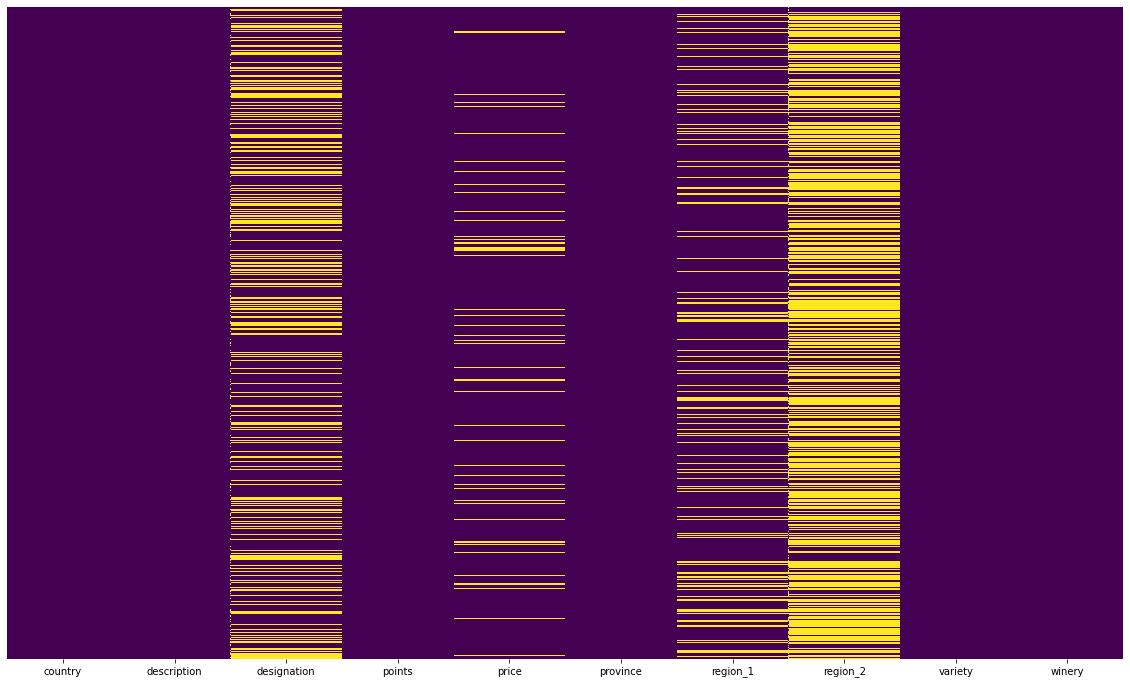

In [26]:
import matplotlib.pyplot as plt # Загружаем модуль matplotlib.pyplot
import seaborn as sns # Загружаем модуль seaborn
%matplotlib inline

fig, ax = plt.subplots(figsize=(20,12)) # Создаем область под график
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis') # Визуализируем прпуски
plt.show() # Отображаем график

Что с ним делать?

Выбора не очень много: <br>

1) Удалять: 
- dropna(axis=0, how='any'): axis = 0 - удаляем построчно, axis = 1 выкидываем столбец; how ='any' - выкидываем, если есть хотя бы одна ячейка пустая. how = 'all' - выкидываем, если есть полностью пустая строка или столбец

2) Вставлять информацию самим:
- fillna() - это отдельное искусство, как заполнять. 

In [28]:
data.fillna("Python").head(10) # С помощью метода .fillna() заменяем все пропуски словом Python

country                                        description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2      US  Mac Watson honors the memory of a wine once ma...   
3      US  This spent 20 months in 30% new French oak, an...   
4  France  This is the top wine from La Bégude, named aft...   
5   Spain  Deep, dense and pure from the opening bell, th...   
6   Spain  Slightly gritty black-fruit aromas include a s...   
7   Spain  Lush cedary black-fruit aromas are luxe and of...   
8      US  This re-named vineyard was formerly bottled as...   
9      US  The producer sources from two blocks of the vi...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   
5                             Numanthia      95   73.0  Northern Spain   
6                             San Román      95   65.0  Northern Spain   
7               Carodorum Único Crianza      95  110.0  Northern Spain   
8                                Silice      95   65.0          Oregon   
9                  Gap's Crown Vineyard      95   60.0      California   

             region_1           region_2             variety  \
0         Napa Valley               Napa  Cabernet Sauvignon   
1                Toro             Python       Tinta de Toro   
2      Knights Valley             Sonoma     Sauvignon Blanc   
3   Willamette Valley  Willamette Valley          Pinot Noir   
4              Bandol             Python  Provence red blend   
5                Toro             Python       Tinta de Toro   
6                Toro             Python       Tinta de Toro   
7                Toro             Python       Tinta de Toro   
8  Chehalem Mountains  Willamette Valley          Pinot Noir   
9        Sonoma Coast             Sonoma          Pinot Noir   

                    winery  
0                    Heitz  
1  Bodega Carmen Rodríguez  
2                 Macauley  
3                    Ponzi  
4     Domaine de la Bégude  
5                Numanthia  
6                 Maurodos  
7  Bodega Carmen Rodríguez  
8                Bergström  
9                Blue Farm

In [ ]:
### Описательные статистики

Теперь посмотрим, а что содержательно у нас есть на руках. 

Глазами просматривать не будем, а попросим посчитать основные описательные статистики. Причем сразу все.

- describe() - метод, который возвращает табличку с описательными статистиками. В таком виде считает все для числовых столбцов

In [29]:
data.describe() # Отобразим описательные статистики нашего датафрейма (только числовые данные)

points          price
count  150930.000000  137235.000000
mean       87.888418      33.131482
std         3.222392      36.322536
min        80.000000       4.000000
25%        86.000000      16.000000
50%        88.000000      24.000000
75%        90.000000      40.000000
max       100.000000    2300.000000

Немножко магии, и для нечисловых данные тоже будут свои описательные статистики. 

In [30]:
data.describe(include=['O']) # # Отобразим описательные статистики нашего датафрейма ('O' - в том числе и строковые)

country                                        description designation  \
count   150925                                             150930      105195   
unique      48                                              97821       30621   
top         US  A little bit funky and unsettled when you pop ...     Reserve   
freq     62397                                                  6        2752   

          province     region_1       region_2     variety           winery  
count       150925       125870          60953      150930           150930  
unique         455         1236             18         632            14810  
top     California  Napa Valley  Central Coast  Chardonnay  Williams Selyem  
freq         44508         6209          13057       14482              374

In [ ]:
### Срезы данных

Допустим, нам не нужен датасет, а только определенные столбцы или строки или столбцы и строки. 


Как делать?
Помним, что:
- у столбцов есть названия
- у строк есть названия
- если нет названий, то они пронумерованы с нуля

Основываясь на этой идее, мы начнем отбирать данные.

In [31]:
data.head(1) # Отобразим первую строчку датафрейма

country                                        description  \
0      US  This tremendous 100% varietal wine hails from ...   

         designation  points  price    province     region_1 region_2  \
0  Martha's Vineyard      96  235.0  California  Napa Valley     Napa   

              variety winery  
0  Cabernet Sauvignon  Heitz

#### Отбираем по столбцам. Версия 1. 

In [22]:
array = data['price'] # Отобразим столбец price
array

0         235.0
1         110.0
2          90.0
3          65.0
4          66.0
          ...  
150925     20.0
150926     27.0
150927     20.0
150928     52.0
150929     15.0
Name: price, Length: 150930, dtype: float64

In [33]:
data.price

0         235.0
1         110.0
2          90.0
3          65.0
4          66.0
          ...  
150925     20.0
150926     27.0
150927     20.0
150928     52.0
150929     15.0
Name: price, Length: 150930, dtype: float64

In [34]:
data.price.head() # Отобразим столбец price (альтернативные вариант)

0    235.0
1    110.0
2     90.0
3     65.0
4     66.0
Name: price, dtype: float64

In [35]:
new_df = data[['price','country']].head() # Отобразим столбцы 'price' и 'country'
new_df

price country
0  235.0      US
1  110.0   Spain
2   90.0      US
3   65.0      US
4   66.0  France

#### Отбираем по  строкам. Версия 1. 

In [36]:
data[10:20] # Отобразим с 10й по 20ю строки датафрейма

country                                        description  \
10   Italy  Elegance, complexity and structure come togeth...   
11      US  From 18-year-old vines, this supple well-balan...   
12      US  A standout even in this terrific lineup of 201...   
13  France  This wine is in peak condition. The tannins an...   
14      US  With its sophisticated mix of mineral, acid an...   
15      US  First made in 2006, this succulent luscious Ch...   
16      US  This blockbuster, powerhouse of a wine suggest...   
17   Spain  Nicely oaked blackberry, licorice, vanilla and...   
18  France  Coming from a seven-acre vineyard named after ...   
19      US  This fresh and lively medium-bodied wine is be...   

                        designation  points  price            province  \
10               Ronco della Chiesa      95   80.0  Northeastern Italy   
11  Estate Vineyard Wadensvil Block      95   48.0              Oregon   
12                   Weber Vineyard      95   48.0              Oregon   
13          Château Montus Prestige      95   90.0    Southwest France   
14                   Grace Vineyard      95  185.0              Oregon   
15                           Sigrid      95   90.0              Oregon   
16                  Rainin Vineyard      95  325.0          California   
17           6 Años Reserva Premium      95   80.0      Northern Spain   
18                    Le Pigeonnier      95  290.0    Southwest France   
19             Gap's Crown Vineyard      95   75.0          California   

                     region_1           region_2             variety  \
10                     Collio                NaN            Friulano   
11               Ribbon Ridge  Willamette Valley          Pinot Noir   
12               Dundee Hills  Willamette Valley          Pinot Noir   
13                    Madiran                NaN              Tannat   
14               Dundee Hills  Willamette Valley          Pinot Noir   
15          Willamette Valley  Willamette Valley          Chardonnay   
16  Diamond Mountain District               Napa  Cabernet Sauvignon   
17           Ribera del Duero                NaN         Tempranillo   
18                     Cahors                NaN              Malbec   
19               Sonoma Coast             Sonoma          Pinot Noir   

                    winery  
10        Borgo del Tiglio  
11  Patricia Green Cellars  
12  Patricia Green Cellars  
13       Vignobles Brumont  
14          Domaine Serene  
15               Bergström  
16                    Hall  
17                Valduero  
18      Château Lagrézette  
19            Gary Farrell

In [ ]:
data[10:20:3] # Отобразим с 10й по 20ю строки датафрейма с шагом 2

country  ...             winery
10   Italy  ...   Borgo del Tiglio
13  France  ...  Vignobles Brumont
16      US  ...               Hall
19      US  ...       Gary Farrell

[4 rows x 10 columns]

In [ ]:
data[::5].head(10) # Отобразим каждую 5ю строку датафрейма

country  ...            winery
0            US  ...             Heitz
5         Spain  ...         Numanthia
10        Italy  ...  Borgo del Tiglio
15           US  ...         Bergström
20           US  ...             Heitz
25  New Zealand  ...       Kumeu River
30     Bulgaria  ...      Villa Melnik
35        Italy  ...          Carillon
40        Spain  ...    Don Bernardino
45        Italy  ...      Vignavecchia

[10 rows x 10 columns]

#### Отбор по столбцам. Версия 2. Все еще по названиям 

In [ ]:
data.head(10)

country  ...                   winery
0      US  ...                    Heitz
1   Spain  ...  Bodega Carmen Rodríguez
2      US  ...                 Macauley
3      US  ...                    Ponzi
4  France  ...     Domaine de la Bégude
5   Spain  ...                Numanthia
6   Spain  ...                 Maurodos
7   Spain  ...  Bodega Carmen Rodríguez
8      US  ...                Bergström
9      US  ...                Blue Farm

[10 rows x 10 columns]

In [37]:
data.loc[4:7, ['price', 'points']] # Отобразим два столбца 'price' и 'points', и в них строки с индексами с 4 по 7

price  points
4   66.0      95
5   73.0      95
6   65.0      95
7  110.0      95

#### Отбор по  строкам. Версия 2. Все еще по названиям 

In [38]:
data.loc[:5,:] # Отобразим строки с индексом от 0 до 5  (то же, что и data.loc[:5])

country                                        description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2      US  Mac Watson honors the memory of a wine once ma...   
3      US  This spent 20 months in 30% new French oak, an...   
4  France  This is the top wine from La Bégude, named aft...   
5   Spain  Deep, dense and pure from the opening bell, th...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   
5                             Numanthia      95   73.0  Northern Spain   

            region_1           region_2             variety  \
0        Napa Valley               Napa  Cabernet Sauvignon   
1               Toro                NaN       Tinta de Toro   
2     Knights Valley             Sonoma     Sauvignon Blanc   
3  Willamette Valley  Willamette Valley          Pinot Noir   
4             Bandol                NaN  Provence red blend   
5               Toro                NaN       Tinta de Toro   

                    winery  
0                    Heitz  
1  Bodega Carmen Rodríguez  
2                 Macauley  
3                    Ponzi  
4     Domaine de la Bégude  
5                Numanthia

#### Отбор по строчкам и столбцам. Версия 3. По номеру строк и столбцов

In [39]:
data.iloc[::5, [1,3]].head() # Отобразим каждую 5 строку и 1 и 3 столбец

description  points
0   This tremendous 100% varietal wine hails from ...      96
5   Deep, dense and pure from the opening bell, th...      95
10  Elegance, complexity and structure come togeth...      95
15  First made in 2006, this succulent luscious Ch...      95
20  Heitz has made this stellar rosé from the rare...      95

#### Отбор с условиями

Так, а если мне нужны вина дороже $15 долларов? Как быть?

In [40]:
#задаем маску
mask = data['price'] > 15

In [41]:
mask.head() # Отобразим маску

0    True
1    True
2    True
3    True
4    True
Name: price, dtype: bool

In [42]:
#и отбираем данные
temp = data[mask] # Выбираем данные из датафрейма в соответствии с маской и записываем их в новый даатафрейм temp
temp # Отображаем temp

country                                        description  \
0           US  This tremendous 100% varietal wine hails from ...   
1        Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           US  Mac Watson honors the memory of a wine once ma...   
3           US  This spent 20 months in 30% new French oak, an...   
4       France  This is the top wine from La Bégude, named aft...   
...        ...                                                ...   
150924  France  Really fine for a low-acid vintage, there's an...   
150925   Italy  Many people feel Fiano represents southern Ita...   
150926  France  Offers an intriguing nose with ginger, lime an...   
150927   Italy  This classic example comes from a cru vineyard...   
150928  France  A perfect salmon shade, with scents of peaches...   

                                 designation  points  price        province  \
0                          Martha's Vineyard      96  235.0      California   
1       Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2              Special Selected Late Harvest      96   90.0      California   
3                                    Reserve      96   65.0          Oregon   
4                                 La Brûlade      95   66.0        Provence   
...                                      ...     ...    ...             ...   
150924                          Diamant Bleu      91   70.0       Champagne   
150925                                   NaN      91   20.0  Southern Italy   
150926                        Cuvée Prestige      91   27.0       Champagne   
150927                         Terre di Dora      91   20.0  Southern Italy   
150928                       Grand Brut Rosé      90   52.0       Champagne   

                 region_1           region_2             variety  \
0             Napa Valley               Napa  Cabernet Sauvignon   
1                    Toro                NaN       Tinta de Toro   
2          Knights Valley             Sonoma     Sauvignon Blanc   
3       Willamette Valley  Willamette Valley          Pinot Noir   
4                  Bandol                NaN  Provence red blend   
...                   ...                ...                 ...   
150924          Champagne                NaN     Champagne Blend   
150925  Fiano di Avellino                NaN         White Blend   
150926          Champagne                NaN     Champagne Blend   
150927  Fiano di Avellino                NaN         White Blend   
150928          Champagne                NaN     Champagne Blend   

                         winery  
0                         Heitz  
1       Bodega Carmen Rodríguez  
2                      Macauley  
3                         Ponzi  
4          Domaine de la Bégude  
...                         ...  
150924  Heidsieck & Co Monopole  
150925    Feudi di San Gregorio  
150926                H.Germain  
150927                Terredora  
150928                   Gosset  

[103342 rows x 10 columns]

In [43]:
data[data.price>300].head()# Альтернативный вариант

country                                        description  \
16        US  This blockbuster, powerhouse of a wine suggest...   
898    Italy  Aromas of crushed plum, asphalt, oak, toast, e...   
2145  France  Full of ripe fruit, opulent and concentrated, ...   
2155  France  There is a sense of pure juicy black-currant f...   
2159  France  With seriously dense tannins, this shows great...   

          designation  points  price    province                   region_1  \
16    Rainin Vineyard      95  325.0  California  Diamond Mountain District   
898       Sorì Tildin      92  500.0    Piedmont                     Langhe   
2145              NaN     100  848.0    Bordeaux             Pessac-Léognan   
2155              NaN      97  450.0    Bordeaux                    Margaux   
2159              NaN      97  330.0    Bordeaux             Pessac-Léognan   

     region_2                     variety              winery  
16       Napa          Cabernet Sauvignon                Hall  
898       NaN                   Red Blend                Gaja  
2145      NaN  Bordeaux-style White Blend  Château Haut-Brion  
2155      NaN    Bordeaux-style Red Blend     Château Margaux  
2159      NaN    Bordeaux-style Red Blend  Château Haut-Brion

In [ ]:
data[(data.price > 200) & ((data.country == 'US') | (data.country == 'France'))].head(15) # Составное условие

country  ...                         winery
0         US  ...                          Heitz
16        US  ...                           Hall
18    France  ...             Château Lagrézette
2145  France  ...             Château Haut-Brion
2155  France  ...                Château Margaux
2159  France  ...             Château Haut-Brion
2434  France  ...  Château La Mission Haut-Brion
2673  France  ...     Jean-Luc and Paul Aegerter
2733  France  ...  Château La Mission Haut-Brion
2742  France  ...               Château Trotanoy
7796  France  ...       Domaine Rossignol-Trapet
7798  France  ...           Bouchard Père & Fils
8071  France  ...               Domaine Faiveley
8072  France  ...                   Louis Latour
8074  France  ...           Chanson Père et Fils

[15 rows x 10 columns]

In [ ]:
### Мультииндексация

In [44]:
data.head() # Отобразим наш датафрем

country                                        description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2      US  Mac Watson honors the memory of a wine once ma...   
3      US  This spent 20 months in 30% new French oak, an...   
4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1           region_2             variety  \
0        Napa Valley               Napa  Cabernet Sauvignon   
1               Toro                NaN       Tinta de Toro   
2     Knights Valley             Sonoma     Sauvignon Blanc   
3  Willamette Valley  Willamette Valley          Pinot Noir   
4             Bandol                NaN  Provence red blend   

                    winery  
0                    Heitz  
1  Bodega Carmen Rodríguez  
2                 Macauley  
3                    Ponzi  
4     Domaine de la Bégude

In [46]:
data_ = data.groupby(['country', 'price']).count() # Сграппируем данные сначала по странам, а затем по price
data_.head(100) # Отобразим первые 50 строк нового датафрейма

description  designation  points  province  region_1  \
country   price                                                         
Albania   20.0             2            0       2         2         0   
Argentina 4.0              3            2       3         3         3   
          5.0              9            1       9         9         9   
          6.0             74           19      74        74        74   
          7.0             61           19      61        61        61   
...                      ...          ...     ...       ...       ...   
          230.0            2            2       2         2         2   
          250.0            1            1       1         1         1   
Australia 5.0             11            0      11        11        11   
          6.0              9            2       9         9         9   
          7.0             51           21      51        51        51   

                 region_2  variety  winery  
country   price                             
Albania   20.0          0        2       2  
Argentina 4.0           0        3       3  
          5.0           0        9       9  
          6.0           0       74      74  
          7.0           0       61      61  
...                   ...      ...     ...  
          230.0         0        2       2  
          250.0         0        1       1  
Australia 5.0           0       11      11  
          6.0           0        9       9  
          7.0           0       51      51  

[100 rows x 8 columns]

In [47]:
data_.loc['US'] # Отобразим все данные для 'US'

description  designation  points  province  region_1  region_2  \
price                                                                    
4.0               9            2       9         9         9         9   
5.0              33           16      33        33        33        32   
6.0              58           13      58        58        58        58   
7.0             206           58     206       206       206       203   
8.0             458          188     458       458       456       444   
...             ...          ...     ...       ...       ...       ...   
350.0             5            0       5         5         5         4   
450.0             1            0       1         1         1         1   
500.0             3            2       3         3         3         3   
625.0             2            2       2         2         2         2   
2013.0            1            1       1         1         1         1   

        variety  winery  
price                    
4.0           9       9  
5.0          33      33  
6.0          58      58  
7.0         206     206  
8.0         458     458  
...         ...     ...  
350.0         5       5  
450.0         1       1  
500.0         3       3  
625.0         2       2  
2013.0        1       1  

[149 rows x 8 columns]

In [48]:
data_.loc['US', 100] # Отобразим данные для 'US', у кого 100 points

description    318
designation    261
points         318
province       318
region_1       318
region_2       317
variety        318
winery         318
Name: (US, 100.0), dtype: int64

In [ ]:
#### Как изменять значения в табличке

In [49]:
data_backup = data.copy() # Создаем копию нашего датафрейма и записываем в переменную data_backup
data.head()

country                                        description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2      US  Mac Watson honors the memory of a wine once ma...   
3      US  This spent 20 months in 30% new French oak, an...   
4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1           region_2             variety  \
0        Napa Valley               Napa  Cabernet Sauvignon   
1               Toro                NaN       Tinta de Toro   
2     Knights Valley             Sonoma     Sauvignon Blanc   
3  Willamette Valley  Willamette Valley          Pinot Noir   
4             Bandol                NaN  Provence red blend   

                    winery  
0                    Heitz  
1  Bodega Carmen Rodríguez  
2                 Macauley  
3                    Ponzi  
4     Domaine de la Bégude

In [50]:
data.iloc[0,1] = 'kotiki' # Вставляем новое значение в 0 строку и 1 стоблец
data.iloc[2,2] = '129' # Вставляем новое значение в 2 строку и 2 стоблец
data.iloc[3:5,2:5] = 'new' # Вставляем новое значение с 3 по 5 строку и со 2го по 5ый стоблец
data.head(8)

country                                        description  \
0      US                                             kotiki   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2      US  Mac Watson honors the memory of a wine once ma...   
3      US  This spent 20 months in 30% new French oak, an...   
4  France  This is the top wine from La Bégude, named aft...   
5   Spain  Deep, dense and pure from the opening bell, th...   
6   Spain  Slightly gritty black-fruit aromas include a s...   
7   Spain  Lush cedary black-fruit aromas are luxe and of...   

                            designation points  price        province  \
0                     Martha's Vineyard     96  235.0      California   
1  Carodorum Selección Especial Reserva     96  110.0  Northern Spain   
2                                   129     96   90.0      California   
3                                   new    new    new          Oregon   
4                                   new    new    new        Provence   
5                             Numanthia     95   73.0  Northern Spain   
6                             San Román     95   65.0  Northern Spain   
7               Carodorum Único Crianza     95  110.0  Northern Spain   

            region_1           region_2             variety  \
0        Napa Valley               Napa  Cabernet Sauvignon   
1               Toro                NaN       Tinta de Toro   
2     Knights Valley             Sonoma     Sauvignon Blanc   
3  Willamette Valley  Willamette Valley          Pinot Noir   
4             Bandol                NaN  Provence red blend   
5               Toro                NaN       Tinta de Toro   
6               Toro                NaN       Tinta de Toro   
7               Toro                NaN       Tinta de Toro   

                    winery  
0                    Heitz  
1  Bodega Carmen Rodríguez  
2                 Macauley  
3                    Ponzi  
4     Domaine de la Bégude  
5                Numanthia  
6                 Maurodos  
7  Bodega Carmen Rodríguez

In [51]:
data = data_backup.copy() # Восстанавливаем данные из копии

In [52]:
data.head()

country                                        description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2      US  Mac Watson honors the memory of a wine once ma...   
3      US  This spent 20 months in 30% new French oak, an...   
4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1           region_2             variety  \
0        Napa Valley               Napa  Cabernet Sauvignon   
1               Toro                NaN       Tinta de Toro   
2     Knights Valley             Sonoma     Sauvignon Blanc   
3  Willamette Valley  Willamette Valley          Pinot Noir   
4             Bandol                NaN  Provence red blend   

                    winery  
0                    Heitz  
1  Bodega Carmen Rodríguez  
2                 Macauley  
3                    Ponzi  
4     Domaine de la Bégude

In [53]:
data.loc[data.country == 'US', 'region_2'] = 'Syberia'
data.loc[data.price > 100, 'points'] = 200
data.loc[data.price > 100, 'price'] = 1000
data.head()

country                                        description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2      US  Mac Watson honors the memory of a wine once ma...   
3      US  This spent 20 months in 30% new French oak, an...   
4  France  This is the top wine from La Bégude, named aft...   

                            designation  points   price        province  \
0                     Martha's Vineyard     200  1000.0      California   
1  Carodorum Selección Especial Reserva     200  1000.0  Northern Spain   
2         Special Selected Late Harvest      96    90.0      California   
3                               Reserve      96    65.0          Oregon   
4                            La Brûlade      95    66.0        Provence   

            region_1 region_2             variety                   winery  
0        Napa Valley  Syberia  Cabernet Sauvignon                    Heitz  
1               Toro      NaN       Tinta de Toro  Bodega Carmen Rodríguez  
2     Knights Valley  Syberia     Sauvignon Blanc                 Macauley  
3  Willamette Valley  Syberia          Pinot Noir                    Ponzi  
4             Bandol      NaN  Provence red blend     Domaine de la Bégude

In [ ]:
## Перевод в Numpy


In [54]:
np_data = data.values # Получаем данные из датафрейма и записываем их в переменную np_data
print(np_data.shape) # Выводим размерность np_data
np_data.dtype

(150930, 10)


dtype('O')

In [55]:
print(np_data[0]) # Выводим 0ой элемент из массива

['US'
 'This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.'
 "Martha's Vineyard" 200 1000.0 'California' 'Napa Valley' 'Syberia'
 'Cabernet Sauvignon' 'Heitz']


In [56]:
# Выведем первые 10 элементов из np_data
for i in range(10):
    print(np_data[i])

['US'
 'This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.'
 "Martha's Vineyard" 200 1000.0 'California' 'Napa Valley' 'Syberia'
 'Cabernet Sauvignon' 'Heitz']
['Spain'
 'Ripe aromas of fig, blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla. This is full, layered, intense and cushioned on the palate, with rich flavors of chocolaty black fruits and baking spices. A toasty, everlasting finish is heady but ideally balanced. Drink through 2023.'
 'Carodorum Selección Especial Reserva' 200 1000.0 'Northern Spain' 'Toro'
 nan 'Tinta de Toro' 'Bodega Carmen Rodríguez']
['US'
 'Mac Watson honors the memory of a wine once made by his mother in this tr

# **Глоссарий**


pd.DataFrame(данные, columns = [колонки, если есть], index = [индексы ,если есть]) - создать датафрейм

pd.read_csv(полный адрес расположения файла) - открыть .csv файл

------------

.head() - посмотреть верхушку датафрейма (первые n строк)

.tail() - посмотреть конец датафрейма (последние n строк)

.columns - список колонок датафрейма

.values - вывести массив всех значений датафрейма

.index - список индексов датафрейма

.tolist() - перевести в список

.count() - посчитать количество определенных величин во фрейме

.describe() - посмотреть основные статистические характеристики фрейма

.shape - форма фрейма (строки, колонки)

.size - размер фрейма строки*колонки

.info() - информация о данных каждой колонки

.dtypes - тип данных каждой колонки

.isnull() - где недостает значений

.isna()- есть ли значения None

.dropna() - выкинуть строки/колонки с None

.fillna() - заполнить заданным значеним ячейки, где есть None

.loc[] - вывести значения по названиям колонок

.iloc[] - вывести значения по индексам колонок

.drop() - выкинуть определенные значения

--------------

pd.to_datetime(колонка, которую переводим в формат временного ряда)

.groupby() - сгруппировать по конкретному признаку

.copy() - создать копию

.sort_values() - сортировка значений

pd.concat([df1,df2]) - конкатенация фреймов

.merge(второй_датафрейм, on = 'общая колонка, по которой склеиваем', how = 'с какой стороны') - конкатенация фреймов через общий признак

-------------


.corr() - вычислить корреляцию

.median() - вычислить медиану

.cumsum() - вычислить куммулятивную сумму

.cumprod() - вычислить коммулятивное произведение

.cummax() - вычислить коммулятивный максимум

-------------

.quantile([]) - вычислить квантили

.nunique() - уникальные значения для n-колонок/строк

.unique() - уникальные значения определенной колонки/строк

------------

.apply(функция) - применить функцию для колонки/строки

.agg(набор_функций) - применить ряд функций для колонки/строки
